In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Analise de dados\Dados\fast_food_ordering_dataset.csv")
df.head()

,order_id,order_time,city,cuisine_type,order_value,delivery_time_minutes,payment_method,items_count
0,ORD100000,2025-10-05 21:16:00,Pune,Healthy,867.98,61,UPI,3
1,ORD100001,2025-06-07 09:40:00,Hyderabad,Fast Food,689.71,26,Wallet,3
2,ORD100002,2025-12-20 18:46:00,Chennai,Fast Food,440.48,30,Credit Card,4
3,ORD100003,2025-06-07 14:10:00,Pune,Mexican,995.17,38,Credit Card,6
4,ORD100004,2025-05-11 00:48:00,Bengaluru,Healthy,853.20,33,Debit Card,7


📊 1. Qual cidade possui o maior número de pedidos realizados?

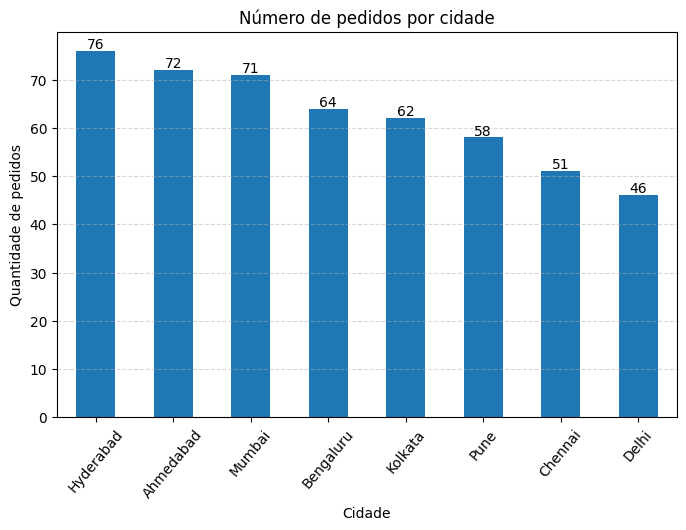

In [4]:
# Comando que mostra o maior numero de pedidos
num_cidade = df['city'].value_counts().sort_values(ascending=False)

# plot do grafico
plt.figure(figsize=(8,5))
num_cidade.plot(kind='bar')

# Colocando o valor em cada barra
for i, value in enumerate(num_cidade.values):
    plt.text(i, value + 0.5, str(value), ha='center', fontsize=10)

# Descrição do grafico
plt.title("Número de pedidos por cidade")
plt.xlabel("Cidade")
plt.ylabel("Quantidade de pedidos")
plt.xticks(rotation=50)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Salvar a imagem do grafico na pasta imagens
plt.savefig(r"C:\Analise de dados\Imagens/grafico_cidades.png", dpi=300, bbox_inches="tight")
plt.show()

Hyderabad, Ahmedabad e Mumbai lidera nos pedidos
Delhi é a cidade com menor volume
Hyderabad e Ahmedabad são mercados dominantes alto fluxo operacional e demanda.
Delhi e Chennai possuem menos pedidos. Oportunidade de expansão com campanhas de growth.

📈 2. Como está distribuído o valor total dos pedidos por tipo de culinária?

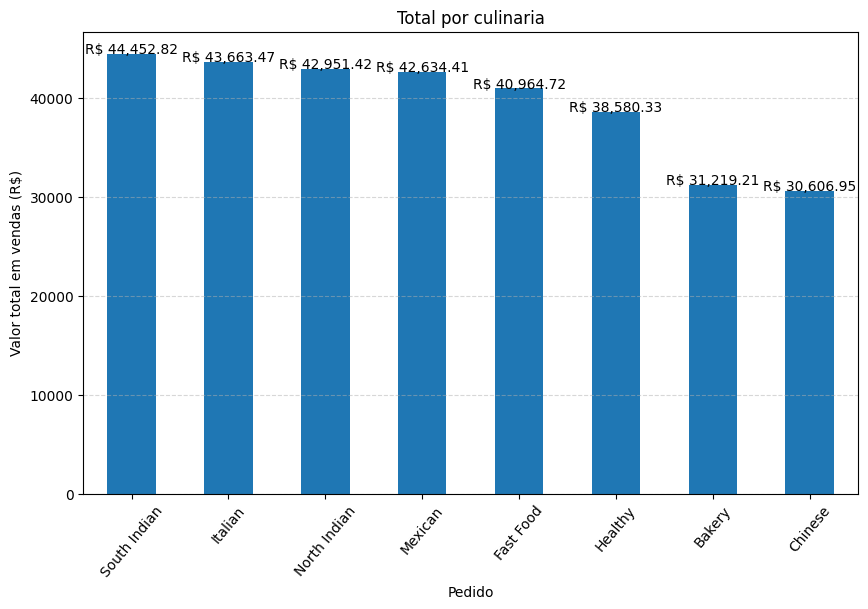

In [5]:
culinaria = df.groupby('cuisine_type')['order_value'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
culinaria.plot(kind='bar')

for i, value in enumerate(culinaria):
    plt.text(i, value + 0.5, f"R$ {value:,.2f}", ha='center', fontsize=10)

plt.title("Total por culinaria")
plt.xlabel("Pedido")
plt.xticks(rotation=50)
plt.ylabel("Valor total em vendas (R$)")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.savefig(r"C:\Analise de dados\Imagens/grafico_Total por culinaria.png", dpi=300, bbox_inches="tight")
plt.show()

South Indian: R$ 44.452,82
Italian: R$ 43.663,47
North Indian: R$ 42.951,42
As três culinárias possuem faturamento bem próximo, mercado equilibrado.
Chinese e Bakery aparecem com menor retorno → podem ser estratégicas para promoções.

🕒 3. Relação entre horário do pedido x valor médio

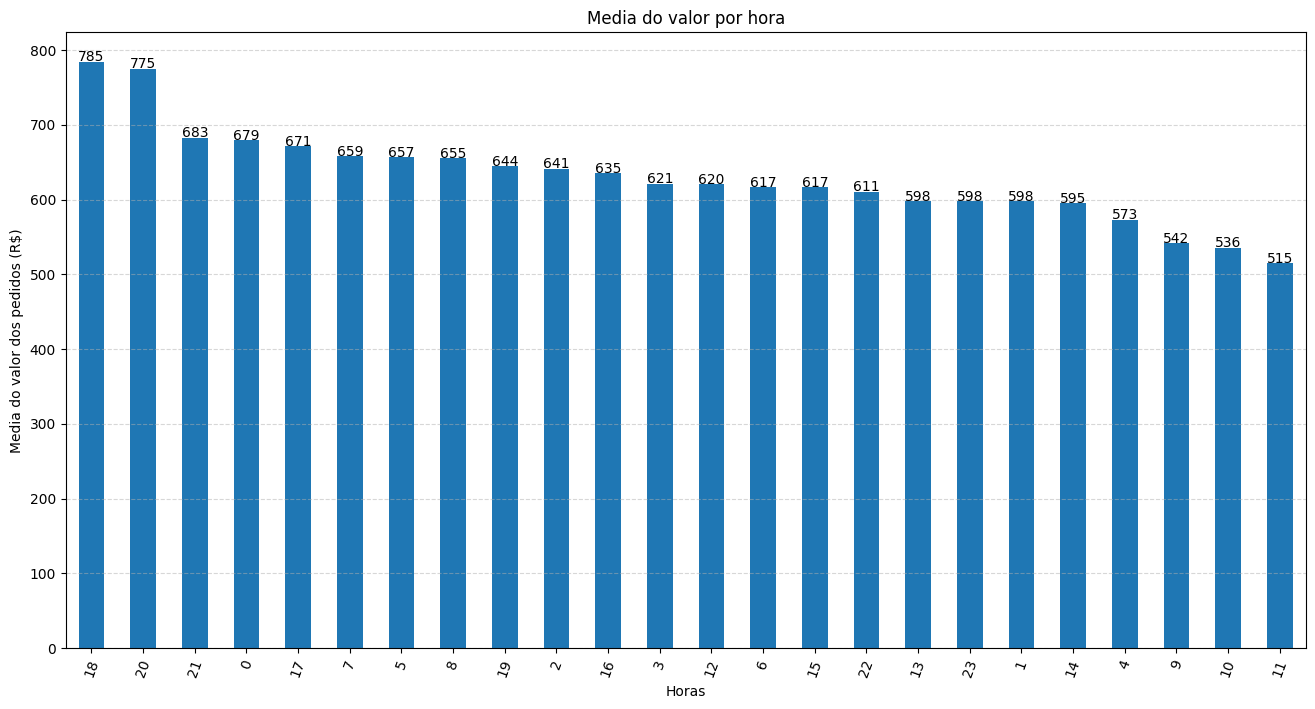

In [6]:
df['order_time'] = pd.to_datetime(df['order_time'])
df['hour'] = df['order_time'].dt.hour

valor_por_hora = df.groupby('hour')['order_value'].mean().sort_index().sort_values(ascending=False)

plt.figure(figsize=(16,8))
valor_por_hora.plot(kind='bar')

for i, value in enumerate(valor_por_hora):
    plt.text(i, value + 0.5, f"{value:,.0f}", ha="center", fontsize=10)

plt.title("Media do valor por hora")
plt.xlabel("Horas")
plt.xticks(rotation=70)
plt.ylabel("Media do valor dos pedidos (R$)")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.savefig(r"C:\Analise de dados\Imagens/grafico_Total por hora.png", dpi=300, bbox_inches="tight")
plt.show()

18h e 20h é o maior valor médio por pedido
Entre 7h e 10h ticket cai bastante
Período 23h é moderado e reduz aos poucos
Picos de ticket no período noturno (18–21h) → jantares, pedidos maiores e combos.
Manhã e madrugada → ticket mais baixo, consumo mais rápido/individual.

🚚 4. Qual é o tempo médio de entrega por cidade e por tipo de culinária?

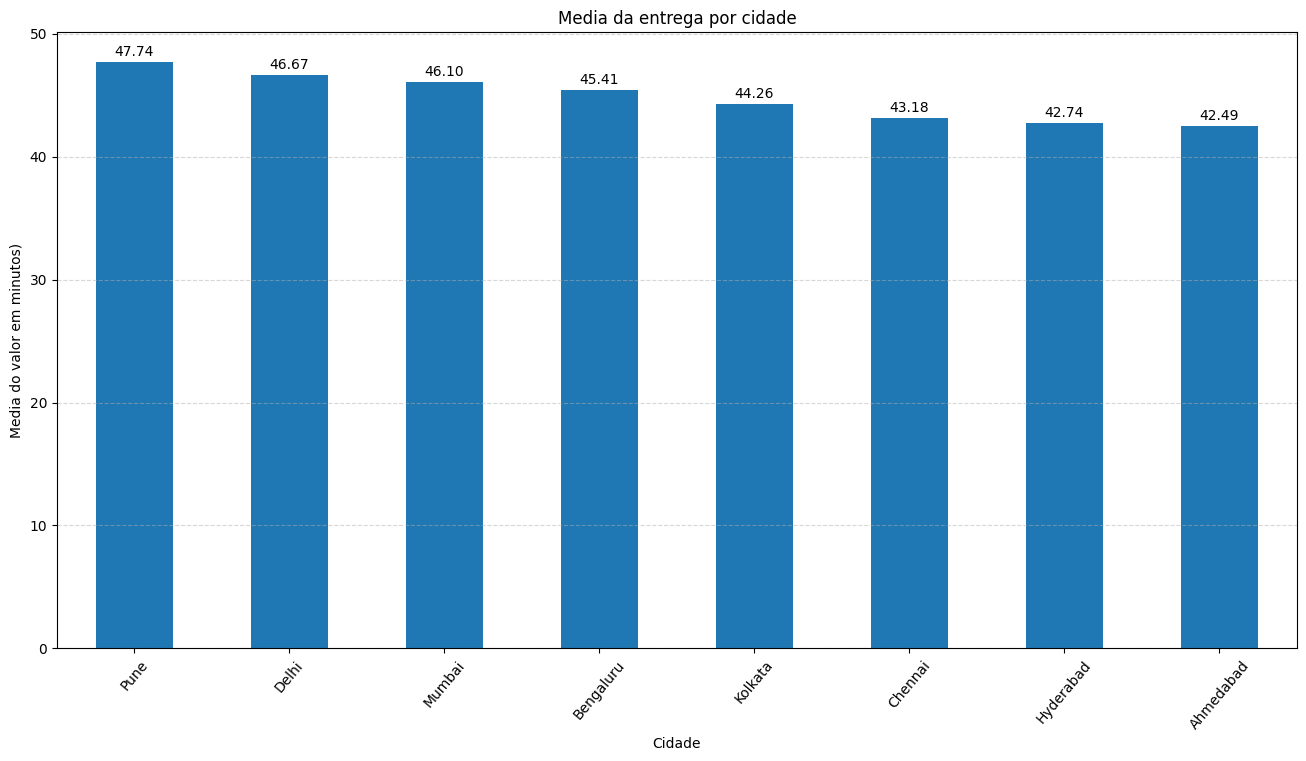

In [7]:
entrega = df.groupby('city')['delivery_time_minutes'].mean().sort_values(ascending=False)

plt.figure(figsize=(16,8))
entrega.plot(kind='bar')

for i, valor in enumerate(entrega):
    plt.text(i, valor + 0.5, f'{valor:.2f}', ha = 'center', fontsize=10)

plt.title("Media da entrega por cidade")
plt.xlabel("Cidade")
plt.xticks(rotation=50)
plt.ylabel("Media do valor em minutos)")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.savefig(r"C:\Analise de dados\Imagens/grafico_Media entrega por minuto.png", dpi=300, bbox_inches="tight")
plt.show()

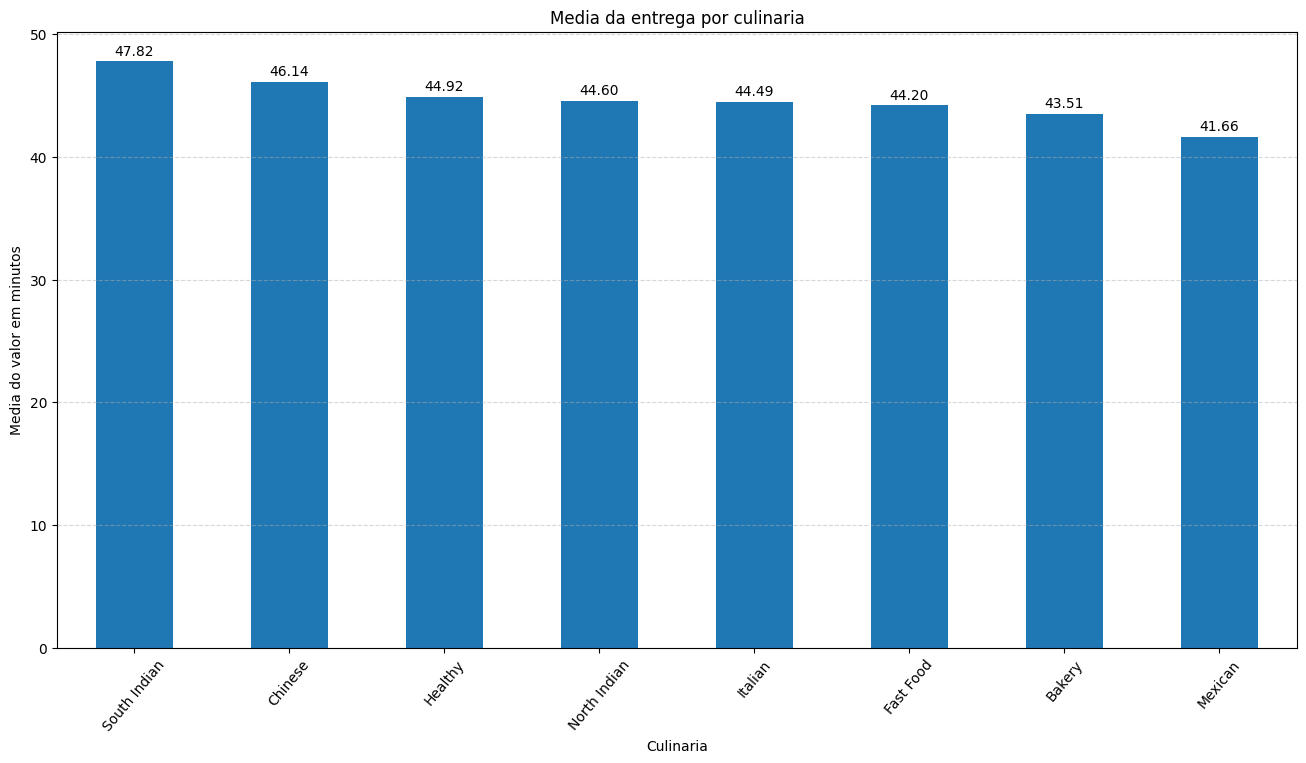

In [8]:
media_entrega_culinaria = df.groupby('cuisine_type')['delivery_time_minutes'].mean().sort_values(ascending=False)

plt.figure(figsize=(16,8))
media_entrega_culinaria.plot(kind='bar')

for i, valor in enumerate(media_entrega_culinaria):
    plt.text(i, valor + 0.5, f'{valor:.2f}', ha = 'center', fontsize=10)

plt.title("Media da entrega por culinaria")
plt.xlabel("Culinaria")
plt.xticks(rotation=50)
plt.ylabel("Media do valor em minutos")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.savefig(r"C:\Analise de dados\Imagens/grafico_Media culinaria por minuto.png", dpi=300, bbox_inches="tight")
plt.show()

Tempo médio de entrega
Por cidade:
Mais rápido → lento
Ahmedabad ≈ 42.48 min
Chennai ≈ 43.17 min
Pune é a mais lenta ≈ 47.74 min

Por culinária:
Demora maior → menor
South Indian → 47.82 min
Chinese → 46.14 min
Mexican → 41.66 min (mais rápida)

Pune apresenta possível gargalo logístico.
South Indian é a mais demorada, pode indicar preparo mais complexo.
Mexican tem melhor média, eficiência de entrega.

💳 5. Qual forma de pagamento é mais utilizada e qual gera maior faturamento?

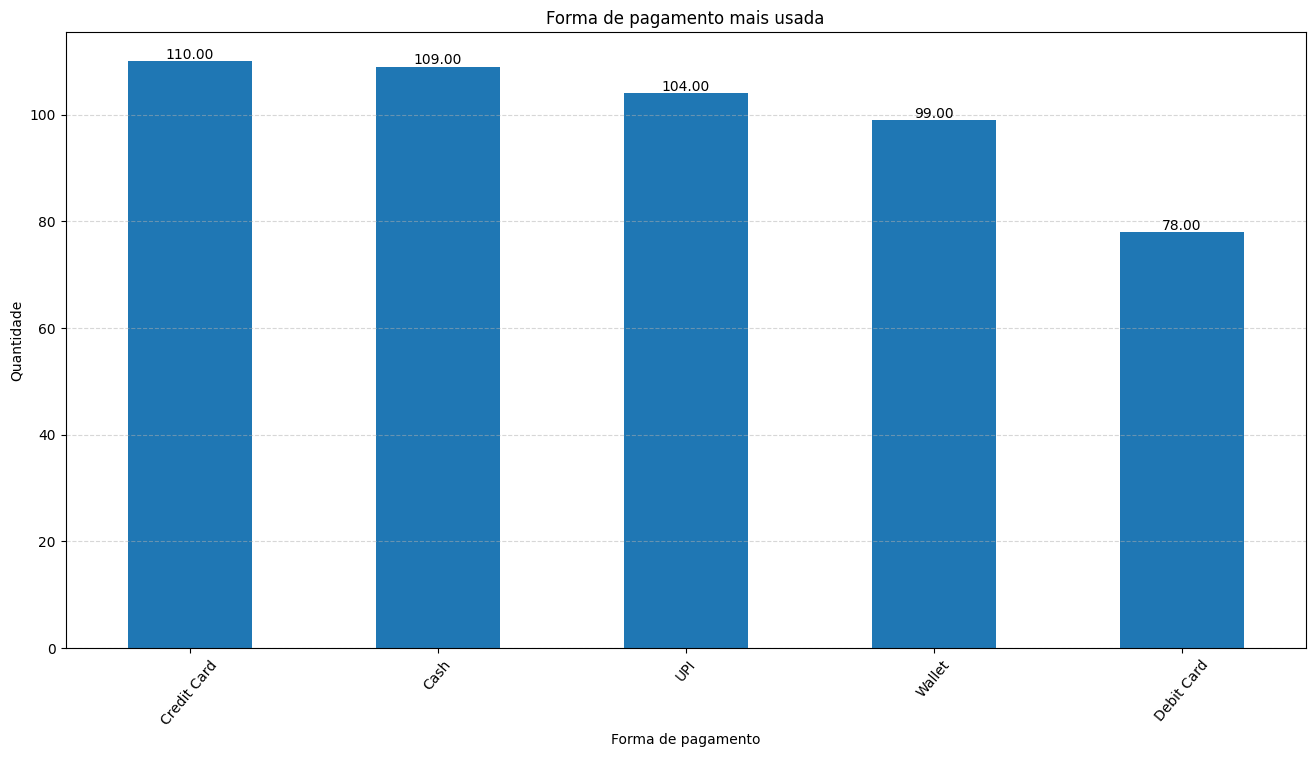

In [9]:
pagamentos_mais_usados = df['payment_method'].value_counts()

plt.figure(figsize=(16,8))
pagamentos_mais_usados.plot(kind='bar')

for i, valor in enumerate(pagamentos_mais_usados):
    plt.text(i, valor + 0.5, f'{valor:.2f}', ha = 'center', fontsize=10)

plt.title("Forma de pagamento mais usada")
plt.xlabel("Forma de pagamento")
plt.xticks(rotation=50)
plt.ylabel("Quantidade")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.savefig(r"C:\Analise de dados\Imagens/grafico_Forma de pagamento.png", dpi=300, bbox_inches="tight")
plt.show()

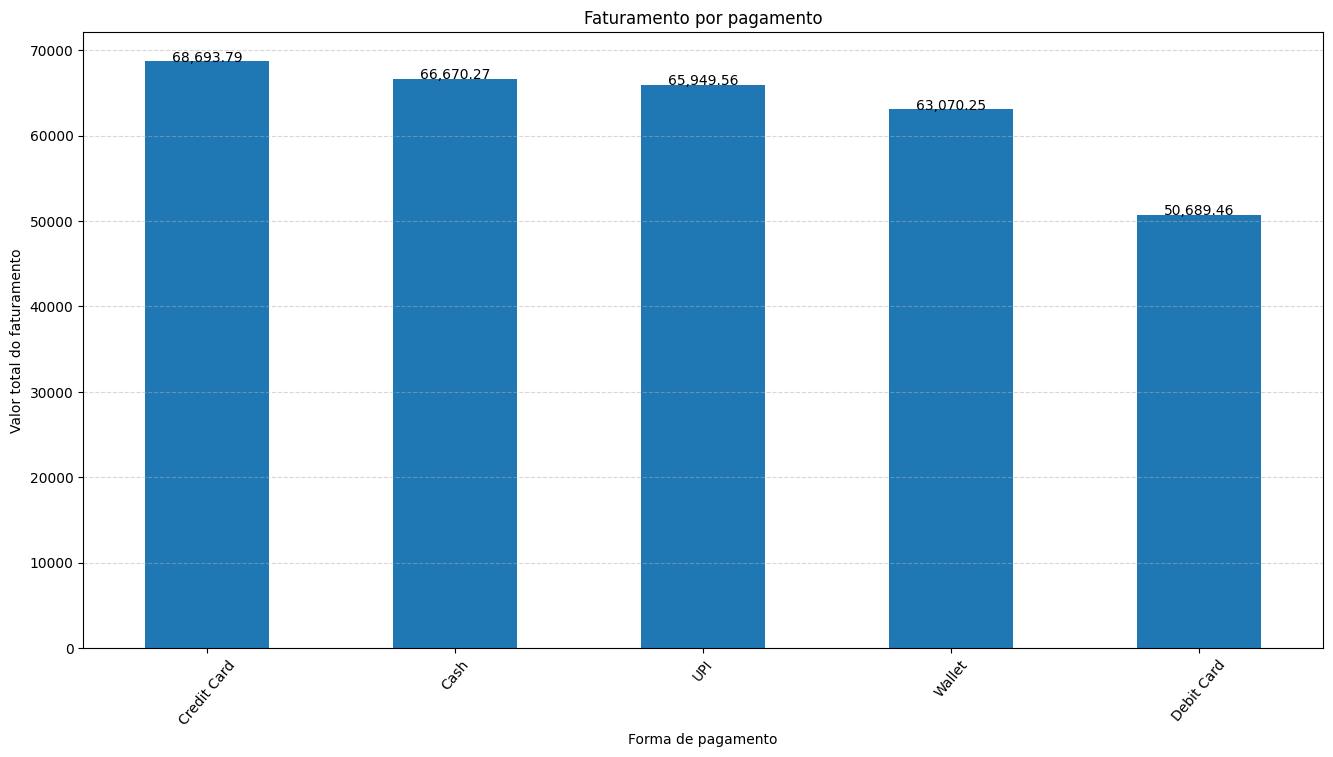

In [10]:
faturamento_por_pagamento = df.groupby('payment_method')['order_value'].sum().sort_values(ascending=False)

plt.figure(figsize=(16,8))
faturamento_por_pagamento.plot(kind='bar')

for i, valor in enumerate(faturamento_por_pagamento):
    plt.text(i, valor + 0.5, f'{valor:,.2f}', ha = 'center', fontsize=10)

plt.title("Faturamento por pagamento")
plt.xlabel("Forma de pagamento")
plt.xticks(rotation=50)
plt.ylabel("Valor total do faturamento")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.savefig(r"C:\Analise de dados\Imagens/grafico_Faturamento pot pagamento.png", dpi=300, bbox_inches="tight")
plt.show()

-- Meios de pagamento
Volume de uso:
Credit Card, Cash, UPI, Wallet e Debit Card
Faturamento:
Credit Card lidera com R$ 68.693,79

Cartão de crédito é o meio mais usado e o mais rentável, oportunidade para cashback e fidelização.
Debit Card é o menos usado e com menor faturamento, baixo impacto na receita.


-- Média de itens por culinária
Mais itens por pedido
South Indian (4.46)
Fast Food (4.33)

South Indian domina também no volume de itens → pedidos robustos, talvez familiares.
Chinese tem menor média → pedidos individuais e rápidos.

🍔 6. Existe diferença no número de itens por pedido entre os diferentes tipos de culinária?

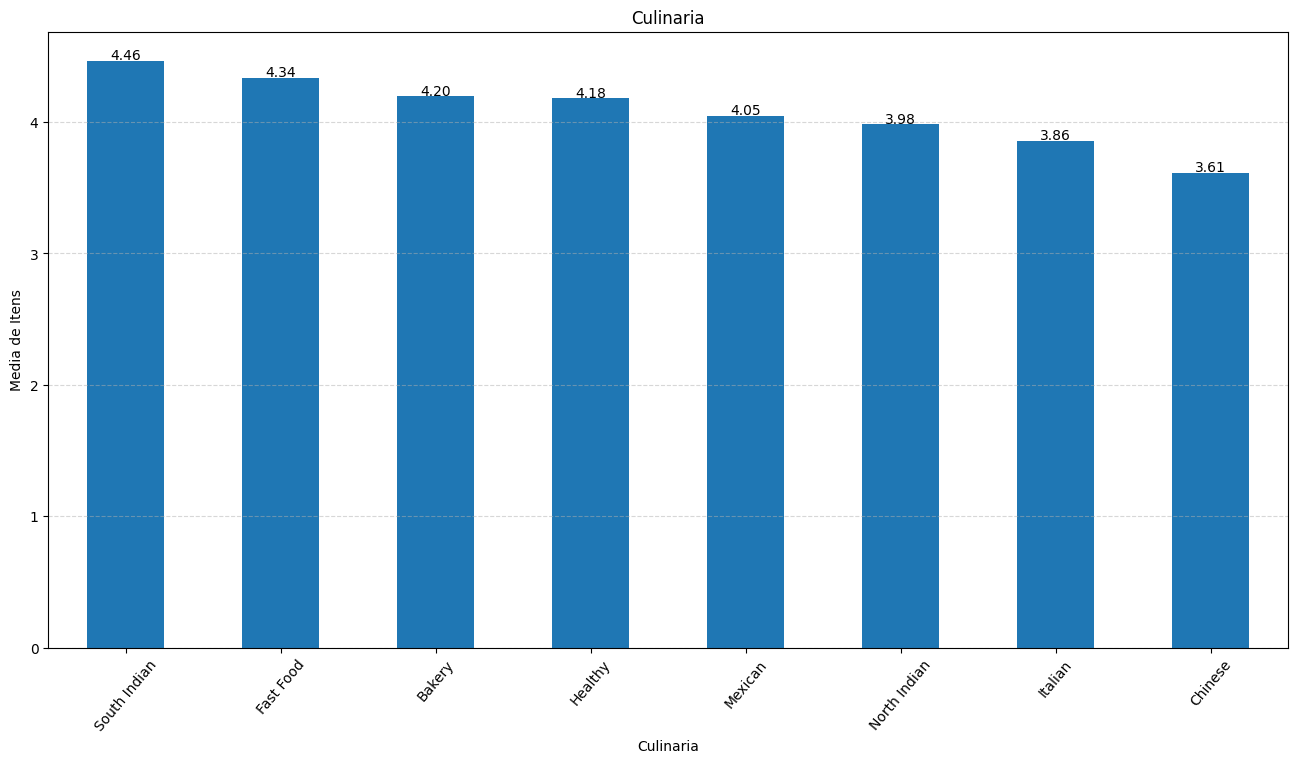

In [11]:
media_itens_culinaria = df.groupby('cuisine_type')['items_count'].mean().sort_values(ascending=False)

plt.figure(figsize=(16,8))
media_itens_culinaria.plot(kind='bar')

for i, valor in enumerate(media_itens_culinaria):
    plt.text(i, valor + 0.01, f'{valor:,.2f}', ha = 'center', fontsize=10)

plt.title("Culinaria")
plt.xlabel("Culinaria")
plt.xticks(rotation=50)
plt.ylabel("Media de Itens")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.savefig(r"C:\Analise de dados\Imagens/grafico_Culinaria por media do item.png", dpi=300, bbox_inches="tight")
plt.show()

South Indian (4.46)
Fast Food (4.33)

South Indian domina também no volume de itens, pedidos robustos, talvez familiares.
Chinese tem menor média, pedidos individuais e rápidos.

🔥 7. Quais são os horários de pico de pedidos ao longo do dia?

In [12]:
horario_pico = df['hour'].value_counts().sort_values(ascending=False)
horario_pico.head(5)

hour
12    30
5     29
4     26
17    26
2     24
Name: count, dtype: int64

Períodos com maior número de pedidos
12h (almoço) maior pico
5h e 17h também fortes
2h tem menor movimento da amostra mostrada

Padrão típico: pico no horário de almoço.
Pode ser reforçado com entregadores extras e promoções.

💰 8. Qual cidade apresenta o maior ticket médio por pedido?

In [13]:
ticket_medio = df.groupby('city')['order_value'].mean().sort_values(ascending=False)
ticket_medio

city
Chennai      693.405882
Bengaluru    656.835938
Kolkata      645.744194
Hyderabad    643.314474
Pune         625.005172
Delhi        613.522174
Ahmedabad    589.361250
Mumbai       589.264225
Name: order_value, dtype: float64

Chennai (≈ R$ 693,40)
Bengaluru e Kolkata também altos
Mumbai e Ahmedabad com menor média

Chennai consome com ticket mais elevado, perfil de cliente premium.
Mumbai tem muitos pedidos mas ticket baixo, ideal para upsell e combos.

In [18]:
df.to_excel("C:/Analise de dados/Novos_dados/dadosatualizado.xlsx", index=False)